In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [72]:
df = pd.DataFrame({ 'Student_Id':[1,2,3,4,5,6,7,8],
        'Name':['sonu','monu','panu','riya','gayu','aradhya','aditi','mayra'],
        'Age':[22,17,None,21,18,10,14,15],
        'Grade':[60,70,77,65,None,88,70,None],
        'Attendance':[90,89,45,67,80,99,56,75]
       })

In [73]:
df.isnull().sum()

Student_Id    0
Name          0
Age           1
Grade         2
Attendance    0
dtype: int64

In [74]:
df.shape

(8, 5)

<Axes: xlabel='Age', ylabel='Density'>

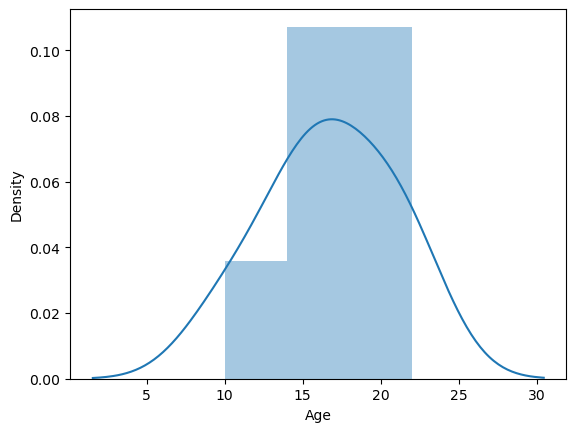

In [75]:
sns.distplot(df['Age'])

<Axes: xlabel='Grade', ylabel='Density'>

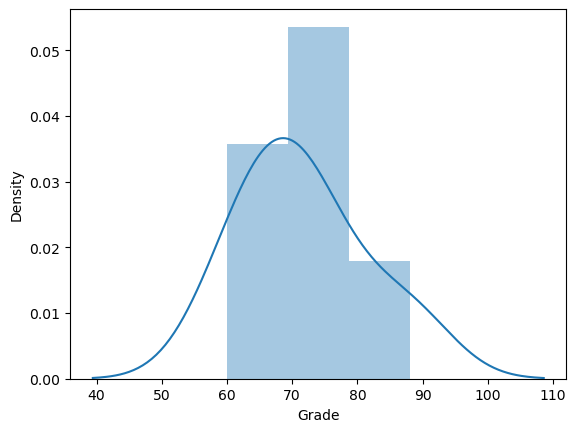

In [76]:
sns.distplot(df['Grade'])

In [77]:
df['Grade']= df['Grade'].fillna(df['Grade'].mean())

In [78]:
df['Age'] =df['Age'].fillna(df['Age'].mean())

In [79]:
df.isnull().sum()

Student_Id    0
Name          0
Age           0
Grade         0
Attendance    0
dtype: int64

<Axes: >

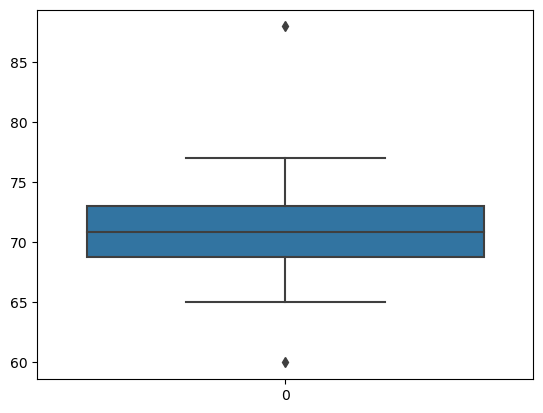

In [80]:
sns.boxplot(df['Grade'])

In [81]:
Q1 = df['Grade'].quantile(0.25)
Q3 = df['Grade'].quantile(0.75)

In [82]:
IQR = Q3-Q1

In [83]:
upper_l = Q3 + 1.5 * IQR
lower_l = Q1 - 1.5 * IQR

In [84]:
df[df['Grade'] > upper_l]

,Student_Id,Name,Age,Grade,Attendance
5,6,aradhya,10.0,88.0,99


In [85]:
df[df['Grade'] < lower_l]

,Student_Id,Name,Age,Grade,Attendance
0,1,sonu,22.0,60.0,90


In [86]:
df1 = df[(df['Grade'] < upper_l) & (df['Grade'] > lower_l)]

In [87]:
df1.shape

(6, 5)

In [93]:
df['Grade'] = np.where(df['Grade'] > upper_l,
                        upper_l,
               np.where(df['Grade'] < lower_l,
                       lower_l,
                       df['Grade']))

<Axes: >

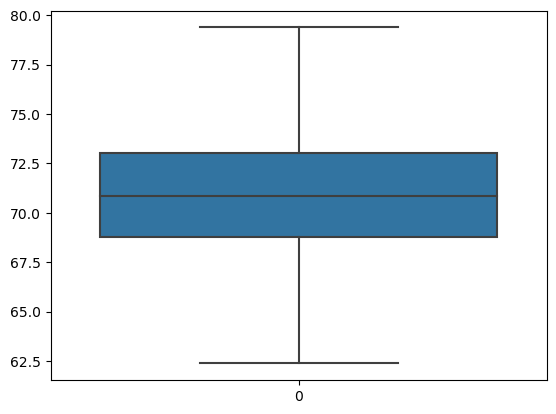

In [94]:
sns.boxplot(df['Grade'])

In [95]:
# data Transformation


In [97]:
from sklearn.preprocessing import StandardScaler
SD = StandardScaler()

In [99]:
df[['Age', 'Grade', 'Attendance']] = SD.fit_transform(df[['Age', 'Grade', 'Attendance']])

print("DataFrame after Standardization:")
print(df.head())

DataFrame after Standardization:
   Student_Id  Name           Age     Grade  Attendance
0           1  sonu  1.470038e+00 -1.625405    0.868474
1           2  monu  7.946149e-02 -0.169106    0.810090
2           3  panu  2.220446e-16  1.167825   -1.758843
3           4  riya  1.191922e+00 -1.124056   -0.474377
4           5  gayu  3.575767e-01  0.149211    0.284626
